# Машинное обучение, ФКН ВШЭ

# Практическое задание 12. Несбалансированные задачи

## Общая информация
Дата выдачи: 01.05.2022

Мягкий дедлайн: 11.05.2022 23:59 MSK

Жёсткий дедлайн: 16.05.2022 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-xx-Username.ipynb

Username — ваша фамилия и имя на латинице именно в таком порядке

## О задании

В этом задании мы разберем основные техники работы в задачах, где один из классов занимает существенно меньшую долю выборки, чем остальные. Для простоты мы обойдемся бинарной задачей, тем не менее, во многом данные методы можно перенести и на задачи с б**о**льшим числом классов. Кроме того, вы получите очередной бесценный опыт исследования случайной библиотеки случайных индусов с нуля.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from tqdm.auto import tqdm
# import warnings
# warnings.filterwarnings('ignore')

**Задание -1 (1 балл)**. EDA

В качестве данных для нашей работы возьмем выложенный на kaggle датасет транзакций, в котором нужно выискивать мошеннические проводки: [клик](https://www.kaggle.com/mlg-ulb/creditcardfraud). Данная задача по определению подходит под несбалансированную, что можно сказать даже без наличия каких-либо данных (понятно, что среди всех транзакций клиентов очень малая часть будет мошеннической).

Загрузим данные, проведем некоторые классические манипуляции.

In [ ]:
"""%%bash
kaggle datasets download -d mlg-ulb/creditcardfraud
unzip creditcardfraud.zip""";

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Наши данные были анонимизированы. Мы имеем 30 признаков, из которых 28 - это результаты PCA-преобразования на исходном датасете. Еще 2 признака представляют собой время в секундах, прошедшее с момента первой транзакции в датасете, и размер транзакции. Скажите, какова доля положительных объектов в выборке?

In [5]:
df['Class'].value_counts(True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Начнем с обработки времени. Секунды сами по себе не несут большой информации о зависимостях в данных, попробуйте по ним создать признаки "час" (от 0 до 23) и "день" (от 0 до ...) в аналогичной манере (принимая первый объект выборки за начальную точку). Сколько дней покрывают данные?

Почти 2 полных дня

In [6]:
172792 / 60 / 60 / 24

1.9999074074074075

In [3]:
df['Hours'] = df['Time'] // 60 // 60
df['Days'] = df['Hours'] // 24

In [8]:
df[['Time', 'Hours', 'Days']]

,Time,Hours,Days
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,2.0,0.0,0.0
...,...,...,...
284802,172786.0,47.0,1.0
284803,172787.0,47.0,1.0
284804,172788.0,47.0,1.0
284805,172788.0,47.0,1.0


Постройте следующие графики:

1. Распределение числа транзакций по каждому часу (line-plot).
2. Распределение доли мошеннических транзакций по каждому часу (line-plot)
3. То же самое для дней (здесь можно использовать bar-plot, так как дней должно быть немного).

Какие выводы можно сделать из графиков? На ваш взгляд, как можно связать полученные нами часы с реальными часами в сутках?

Доля мошеннических операций сильно выше при низком количестве транзакций. Это может говорить о том, что мошенники работают в периоды низкой активности клиентов. Однако, так как доля растет просто так при низком числе транзакций в конкретный час, то можно предположить, что число мошеннических транзакций примерно одинаково в каждый час. \
Если смотреть на абсолютное число таких транзакций, то видно, что ночью они колеблются в районе 10 с большой дисперсией, тогда как днем их дисперсия снижается и график становится более гладким.

Можно предположить, что количество транзакций минимально примерно в 5 часов утра, тогда почасовой график транзакций совпадает с реальными часами в сутках. Периоды наибольшей активности как раз приходятся на часы с 10 до 20, то есть днем, тогда как после полуночи количество транзакций резко сокращается. 

Наибольший объем транзакций приходится на утро, достигая максимума в 10 часов утра, то есть в самое начало рабочего дня, тогда как к вечеру объемы снижаются, при этом количество транзакций растет.

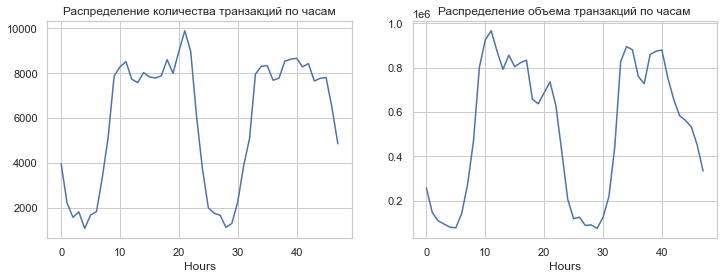

In [74]:
fig, axs = plt.subplots(1, 2, sharex=True, figsize=(6*2, 4))

axs[0].plot(df['Hours'].value_counts().sort_index())
axs[0].set_title('Распределение количества транзакций по часам')
axs[0].set(xlabel='Hours')

axs[1].plot(df.groupby('Hours')['Amount'].sum())
axs[1].set_title('Распределение объема транзакций по часам')
axs[1].set(xlabel='Hours');

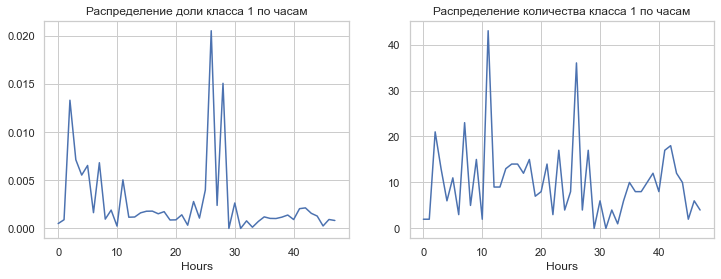

In [85]:
fig, axs = plt.subplots(1, 2, sharex=True, figsize=(6*2, 4))

axs[0].plot(df.groupby('Hours')['Class'].mean())
axs[0].set_title('Распределение доли класса 1 по часам')
axs[0].set(xlabel='Hours')

axs[1].plot(df.groupby('Hours')['Class'].sum())
axs[1].set_title('Распределение количества класса 1 по часам')
axs[1].set(xlabel='Hours');

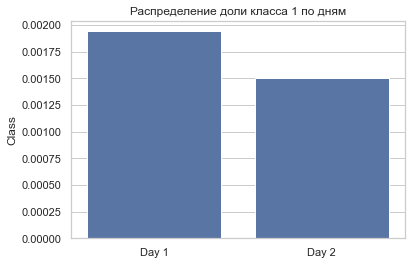

In [198]:
plt.title('Распределение доли класса 1 по дням')

sns.barplot(x=['Day 1', 'Day 2'], y=df.groupby('Days')['Class'].mean(), color='b');

In [197]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

С анонимизированными признаками вряд ли можно придумать что-то интересное. Попробуйте (например, с помощью корреляции?) выбрать несколько наиболее важных признаков и поглядеть на различия в их распределении для разных классов.

In [159]:
corr_y = df.corrwith(df['Class']).abs().sort_values()[-5:]
corr_y

V10      0.216883
V12      0.260593
V14      0.302544
V17      0.326481
Class    1.000000
dtype: float64

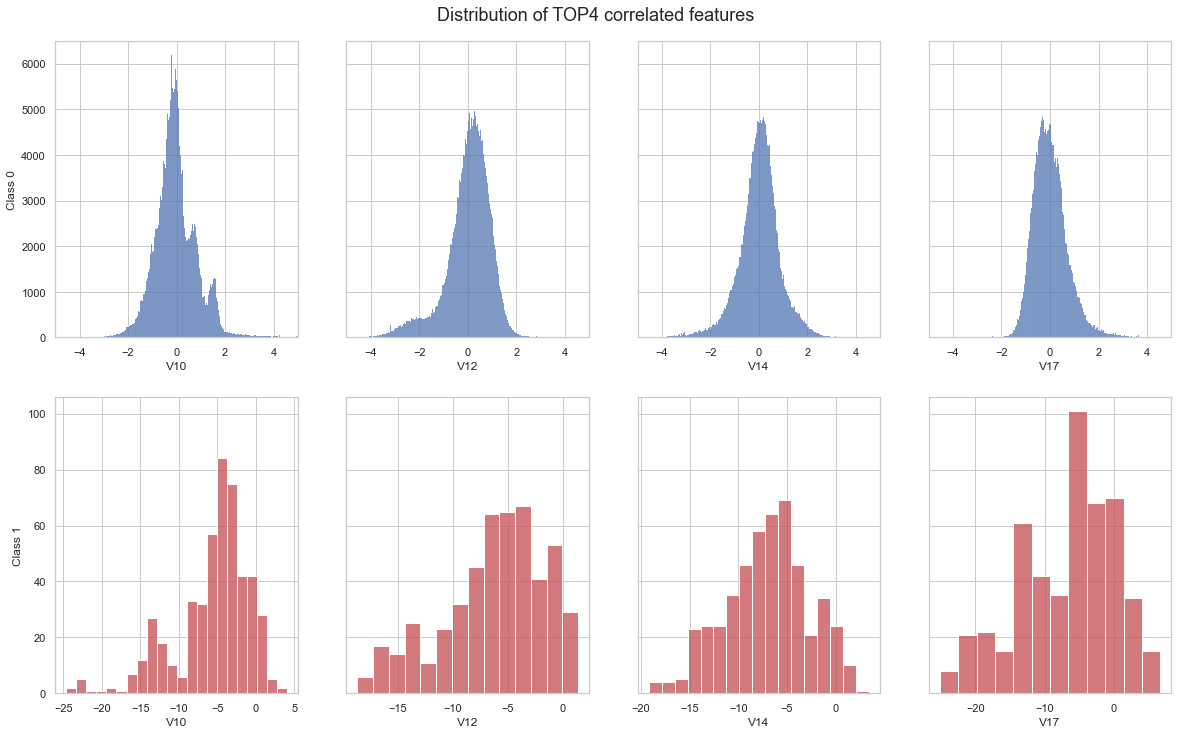

In [208]:
fig, axes = plt.subplots(2, 4, figsize=(4*5, 6*2), sharey='row')
fig.suptitle('Distribution of TOP4 correlated features', y=0.92, size=18)

for i in range(4):
    g0 = sns.histplot(df[df['Class'] == 0][corr_y.index[i]], ax=axes[0, i], color='b')
    g0.set(xlim=(-5, 5), ylabel='Class 0')
    
    g1 = sns.histplot(df[df['Class'] == 1][corr_y.index[i]], ax=axes[1, i], color='r')
    g1.set(xlim=(None, None), ylabel='Class 1')

Видно, что для обычных операций среднее значение главных компонент около нуля, тогда как для мошеннических явно меньше нуля.

Теперь давайте разделим данные. Отделите хронологически последние 20% транзакций и поделите их пополам (также хронологически, т.е. без перемешивания) на валидационные и тестовые. Это разбиение не совсем корректно (как можно было заметить, мошеннические транзакции имеют разное распределение во времени - по-хорошему, нам стоило бы выделить целые сутки записей как под валидацию, так и под тест), тем не менее, мы не сможем получить больше данных для адекватного контроля, поэтому обойдемся этим. 

In [227]:
(df.sort_values('Time', kind='stable', ignore_index=True) == df).all().all()

True

In [4]:
split = int(df.shape[0] * 0.1)
split

28480

In [5]:
X = df.drop('Class', axis=1)
y = df['Class']

In [6]:
X_train, y_train = X.iloc[:-split*2], y.iloc[:-split*2]
X_val, y_val  = X.iloc[-split*2:-split], y.iloc[-split*2:-split]
X_test, y_test = X.iloc[-split:], y.iloc[-split:]

# Часть 1. Несбалансированная классификация.

**Задание 0. (1 балл)**: перед началом работы давайте поговорим о том, как мы будем оценивать качество. Классические метрики для качества классификации чаще всего "ломаются" на задачах с сильным перекосом. Чему будет равно значение accuracy для наивного предсказания (= мажорный класс для каждого объекта)? (можете не отвечать, просто подумайте)

Из курса МО-1 вам уже известно, что мы можем использовать в таких задачах `AUC-PR` и получать адекватные показатели. Можно сказать, что `AUC-PR` представляет собой матожидание `precision` по распределению, заданному выигрышем в `recall` при смене порога. 

In [7]:
np.random.seed(2022)

In [8]:
(y_test == 0).mean()

0.9992275280898877

In [9]:
from sklearn.metrics import auc, precision_recall_curve

def auc_pr(y_test, y_probas):
    precision, recall, _ = precision_recall_curve(y_test, y_probas)
    return auc(recall, precision)

Тем не менее, существуют и другие, не менее интересные метрики. Одной из таких метрик является коэффициент Каппа Коэна, представляющий собой нормализованную `accuracy`:

$$\kappa = \frac{p_o - p_e}{1 - p_e}$$

Данная метрика служит в качестве меры согласованности между двумя независимыми предсказателями, но ничего не знает про "верные" и "предсказанные" метки (в отличие от многих других метрик машинного обучения). Здесь $p_o$ - доля согласованных предсказаний, а $p_e$ - доля согласованных предсказаний, которая могла бы получиться при случайных ответах предсказателей. В нашем случае это работает так:

• В качестве $p_o$ берем accuracy

• В качестве $p_e$ примем следующую величину - вероятность случайного соглашения позитивных ответов (произведение долей позитивных ответов в обоих предсказаниях) плюс вероятность случайного соглашения негативных ответов (произведение долей негативных ответов в обоих предсказаниях)

Метрика принимает значения от -1 до 1, где 1 - полная согласованность, 0 - согласованность на уровне рандома, -1 - совсем плохо. Как уже говорилось, метрика не различает "верные" и "предсказанные" метки, поэтому является симметричной (можете использовать это для отладки):

In [10]:
def kappa_cohen(y_test, y_pred):
    p_o = (y_pred == y_test).mean()
    p_e = (y_pred == 0).mean() * (y_test == 0).mean() + (y_pred == 1).mean() * (y_test == 1).mean()
    
    return (p_o - p_e) / (1 - p_e)

# or from sklearn.metrics import cohen_kappa_score

Еще одной метрикой в такой задаче служит коэффициент корреляции Мэтьюза, выражающийся в терминах матрицы ошибок следующим образом:

$$\text{MCC} = \frac{TP\times TN - FP \times FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$$ 

Метрика принимает значения от -1 до 1, интерпретируемые аналогичным образом. 

In [11]:
from sklearn.metrics import confusion_matrix

def mcc(y_test, y_pred):
    eps = 1
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    return (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) + eps)

Обратите внимание, что эти метрики вычисляются на бинаризованных предсказаниях, поэтому может иметь смысл дополнительная настройка порога бинаризации.

Давайте проверим, что наши метрики действительно подходят под задачу. Вычислите их значения для наивного предсказания (aka мажорный класс для всех объектов):

In [12]:
y_pred = np.array([0] * split)

def results(y_true, y_pred):
    print(f'AUC PR:\t {auc_pr(y_true, y_pred)}')
    print(f'Kappa:\t {kappa_cohen(y_true, y_pred)}')
    print(f'MCC:\t {mcc(y_true, y_pred)}')

results(y_test, y_pred)

AUC PR:	 0.5003862359550562
Kappa:	 0.0
MCC:	 0.0


Давайте запустим бейзлайн-решение для нашей задачи. С чего же начнем? Возьмите `catboost` и обучите его классификатор на наших данных (используйте все признаки). Вычислите значения всех метрик на тестовой части, для контроля переобучения используйте валидационную (здесь и далее везде, где фигурирует `catboost`). 

In [306]:
# !pip install catboost

In [359]:
from catboost import CatBoostClassifier

for lr in [1, 0.1, 0.01]:
    for d in tqdm([5, 7, 9]):
        based = CatBoostClassifier(iterations=100,
                                   learning_rate=lr, 
                                   depth=d, 
                                   verbose=0).fit(X_train, y_train)
        y_pred = based.predict(X_val)

        print(f'\t lr = {lr}, depth = {d}')
        results(y_val, y_pred)

  0%|          | 0/3 [00:00<?, ?it/s]

	 lr = 1, depth = 5
AUC PR:	 0.8653915989518969
Kappa:	 0.850821655703036
MCC:	 0.8578635968831203
	 lr = 1, depth = 7
AUC PR:	 0.8653915989518969
Kappa:	 0.850821655703036
MCC:	 0.8578635968831203
	 lr = 1, depth = 9
AUC PR:	 0.858753908734365
Kappa:	 0.8349082488680916
MCC:	 0.8465240717550727


  0%|          | 0/3 [00:00<?, ?it/s]

	 lr = 0.1, depth = 5
AUC PR:	 0.8459333959138523
Kappa:	 0.8258121287785526
MCC:	 0.8355744143393784
	 lr = 0.1, depth = 7
AUC PR:	 0.8775867209031164
Kappa:	 0.8599909242172248
MCC:	 0.8685459101180174
	 lr = 0.1, depth = 9
AUC PR:	 0.8681703148187407
Kappa:	 0.8475856126812334
MCC:	 0.8576052920972796


  0%|          | 0/3 [00:00<?, ?it/s]

	 lr = 0.01, depth = 5
AUC PR:	 0.8399210965656136
Kappa:	 0.8087007646279862
MCC:	 0.8239170598346655
	 lr = 0.01, depth = 7
AUC PR:	 0.8399210965656136
Kappa:	 0.8087007646279862
MCC:	 0.8239170598346655
	 lr = 0.01, depth = 9
AUC PR:	 0.8399210965656136
Kappa:	 0.8087007646279862
MCC:	 0.8239170598346655


In [360]:
based = CatBoostClassifier(iterations=100,
                           learning_rate=0.1, 
                           depth=7, 
                           verbose=0).fit(X_train, y_train)
y_pred = based.predict(X_test)
results(y_test, y_pred)

AUC PR:	 0.7072111565089093
Kappa:	 0.6997912874821827
MCC:	 0.703321650936739


Если вы все сделали правильно, у вас должны были получиться значения в районе 0.7.

**Задание 1. (1 балл)**. Многие реализации методов предлагают встроенные способы для борьбы с нашей проблемой. Самое часто встречающееся решение - просто добавить вес в функции потерь для минорного класса (таким образом, ошибка на объекте минорного класса будет весить больше, чем для мажорного). В `catboost` это также реализовано, причем для бинарной задачи это можно сделать целыми двумя способами (можете выбрать любой, на свой вкус, автор задания предпочитает отдельный скейлинг для минорного класса). Чаще всего в качестве веса берется отношение числа объектов мажорного класса к числу минорного. Попробуйте обучить модель с таким скалированием и сравните метрики на тестовой части с бейзлайном.

In [355]:
weight = (y_train == 0).sum() / y_train.sum()
weight

545.3956834532374

In [357]:
for lr in [1, 0.1, 0.01]:
    for d in [2, 5, 7]:
        based = CatBoostClassifier(iterations=100,
                                   learning_rate=lr, 
                                   depth=d, 
                                   class_weights=(1, weight),
                                   verbose=0).fit(X_train, y_train)
        y_pred = based.predict(X_val)
        print(f'\t lr = {lr}, depth = {d}: AUC PR {auc_pr(y_val, y_pred)}')

	 lr = 1, depth = 2: AUC PR 0.6105978439181481
	 lr = 1, depth = 5: AUC PR 0.7360948431206275
	 lr = 1, depth = 7: AUC PR 0.7163846005330264
	 lr = 0.1, depth = 2: AUC PR 0.5288673366667292
	 lr = 0.1, depth = 5: AUC PR 0.6543827800232277
	 lr = 0.1, depth = 7: AUC PR 0.8432280437101656
	 lr = 0.01, depth = 2: AUC PR 0.5272213751508771
	 lr = 0.01, depth = 5: AUC PR 0.5570281335420553
	 lr = 0.01, depth = 7: AUC PR 0.625751824076037


In [354]:
based = CatBoostClassifier(iterations=100,
                           learning_rate=0.1, 
                           depth=7, 
                           verbose=0,
                           class_weights=(1, weight)).fit(X_train, y_train)
y_pred = based.predict(X_test)
results(y_test, y_pred)

AUC PR:	 0.6304083673816819
Kappa:	 0.6150414965802498
MCC:	 0.622465370549372


Качество снизилось (все метрики упали примерно на 10%).

Поскольку данный вес будет являться гиперпараметром метода, было бы опрометчиво остановиться на одном значении (тем более, с большой вероятностью у вас все сломалось). Запустите перебор для этого гиперпараметра на валидационной выборке (используйте `PR-AUC`), подберите оптимальный порог бинаризации для $\kappa$ или $\text{MCC}$. Для лучшего найденного веса и порога вычислите все метрики на тестовой части. 

При этом можете также проверить отдельное скалирование в большую сторону для мажорного класса (т.е. веса минорного сделать меньше 1) и экстремальные скалирования (т.е. веса минорного больше, чем в начале этого задания). Какой вес получился оптимальным?

In [363]:
for weight in [0.01, 0.1, 10, 100, 1000]:
    for lr in [1, 0.1]:
        for d in [5, 7, 8]:
            based = CatBoostClassifier(iterations=100,
                                       learning_rate=0.1, 
                                       depth=d, 
                                       class_weights=(1, weight),
                                       verbose=0).fit(X_train, y_train)
            y_pred = based.predict(X_val)
            print(f'\t weight = {weight}, lr = {lr}, depth = {d}: AUC PR {auc_pr(y_val, y_pred)}')

	 weight = 0.01, lr = 1, depth = 5: AUC PR 0.5009304775280898
	 weight = 0.01, lr = 1, depth = 7: AUC PR 0.5574289140343438
	 weight = 0.01, lr = 1, depth = 8: AUC PR 0.5103468836124655
	 weight = 0.01, lr = 0.1, depth = 5: AUC PR 0.5009304775280898
	 weight = 0.01, lr = 0.1, depth = 7: AUC PR 0.5574289140343438
	 weight = 0.01, lr = 0.1, depth = 8: AUC PR 0.5103468836124655
	 weight = 0.1, lr = 1, depth = 5: AUC PR 0.8493375026499894
	 weight = 0.1, lr = 1, depth = 7: AUC PR 0.858753908734365
	 weight = 0.1, lr = 1, depth = 8: AUC PR 0.8305046904812381
	 weight = 0.1, lr = 0.1, depth = 5: AUC PR 0.8493375026499894
	 weight = 0.1, lr = 0.1, depth = 7: AUC PR 0.858753908734365
	 weight = 0.1, lr = 0.1, depth = 8: AUC PR 0.8305046904812381
	 weight = 10, lr = 1, depth = 5: AUC PR 0.8529412722023025
	 weight = 10, lr = 1, depth = 7: AUC PR 0.8427029999728838
	 weight = 10, lr = 1, depth = 8: AUC PR 0.8653915989518969
	 weight = 10, lr = 0.1, depth = 5: AUC PR 0.8529412722023025
	 weight =

In [469]:
based = CatBoostClassifier(iterations=100,
                           learning_rate=0.1, 
                           depth=7, 
                           verbose=0,
                           class_weights=(1, 10)).fit(X_train, y_train)
y_pred = based.predict(X_test)
results(y_test, y_pred)

AUC PR:	 0.7446940816673963
Kappa:	 0.7439928872385557
MCC:	 0.7441944609764755


In [459]:
y_probas = based.predict_proba(X_val)
_, _, thresholds = precision_recall_curve(y_test, y_probas[:, 1])

In [451]:
kappa_dct, mcc_dct = {}, {}

for t in tqdm(thresholds):
    y_pred = y_probas[:, 1] > t
    kappa_dct[t] = kappa_cohen(y_val, y_pred)
    mcc_dct[t] = mcc(y_val, y_pred)

  0%|          | 0/27509 [00:00<?, ?it/s]

In [453]:
max(kappa_dct.values())

0.850821655703036

In [455]:
print(f'Max Kappa: {kappa_dct[max(kappa_dct, key=kappa_dct.get)]}, threshold = {max(kappa_dct, key=kappa_dct.get)}' )
print(f'Max MCC: {mcc_dct[max(mcc_dct, key=kappa_dct.get)]}, threshold = {max(mcc_dct, key=mcc_dct.get)}' )

Max Kappa: 0.850821655703036, threshold = 0.42880829212730515
Max MCC: 0.8578635968831203, threshold = 0.42880829212730515


In [460]:
y_pred = based.predict_proba(X_test)[:, 1] > max(kappa_dct, key=kappa_dct.get)
print(f'Max Kappa Test: {kappa_cohen(y_test, y_pred)}')
print(f'Max MCC Test: {mcc(y_test, y_pred)}')

Max Kappa Test: 0.7270618902497477
Max MCC Test: 0.7270618902488186


**Задание 2. (1 балл)**. На самом деле, то, что мы сейчас делали, очень схоже с другой распространенной техникой - оверсэмплингом. Фактически, мы можем продублировать все объекты минорного класса и получить тот же эффект, какой был бы при использовании веса, равного 2. Тем не менее, такой подход - это лишь малая часть того, что мы можем проделать с целью повысить число объектов минорного класса. 

Для продолжения работы установим библиотеку [imbalanced-learn](https://imbalanced-learn.org/stable/):

In [461]:
# !pip3 install imbalanced-learn

Первый метод, которым мы воспользуемся, называется SMOTE (его вы уже разбирали на лекции). Кратко напомним суть: мы выбираем случайного кандидата среди $k$ ближайших соседей объекта минорного класса, затем берем точку на отрезке между двумя объектами (т.е. выпуклую комбинацию со случайными коэффициентами) и добавляем в выборку. 

In [466]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
X_res.shape

(454860, 32)

Используйте SMOTE для ресэмплинга обучающей выборки, на новой выборке обучите модель (вес положительных объектов скалировать не нужно). Замерьте качество на тестовой выборке (**важно!** не преобразовывайте валидационную и тестовую выборку никак - мы не хотим отслеживать качество на объектах, которых в реальности не существует). Сравните полное выравнивание выборки с частичным (т.е. таким, что баланс классов улучшается, но не достигает равенства - скажем, 1:2 и 1:10).

In [470]:
based = CatBoostClassifier(iterations=100,
                           learning_rate=0.1, 
                           depth=7, 
                           verbose=0,
                           class_weights=(1, 1)).fit(X_res, y_res)
y_pred = based.predict(X_test)
results(y_test, y_pred)

AUC PR:	 0.5637417007150153
Kappa:	 0.5156462585033923
MCC:	 0.5389049049031063


In [471]:
based = CatBoostClassifier(iterations=100,
                           learning_rate=0.1, 
                           depth=7, 
                           verbose=0,
                           class_weights=(1, 0.1)).fit(X_res, y_res)
y_pred = based.predict(X_test)
results(y_test, y_pred)

AUC PR:	 0.649455986429301
Kappa:	 0.6396882696265602
MCC:	 0.6443525273921867


Полное выравнивание выборки работает хуже, чем частичный оверсемплинг 1 к 10.

**Бонус (1.5 балла)**. Для vanilla SMOTE существуют некоторые модификации, часть из которых была реализована в библиотеке imblearn. Во время лекций/семинаров эти модификации не рассматривались, тем не менее, мы все равно их исследуем.

Найдите статьи о следующих методах и попробуйте вкратце сформулировать, в чем их основная идея (сделайте так, чтобы человек, знакомый с машинным обучением в целом, но не слышавший конкретно про это смог понять):

* BorderlineSMOTE - в обычном SMOTE есть проблема генерации данных для точек минорного класса, которые появляются в мажорном классе, таким образом синтетические точки генерируются "чужой территории". BorderlineSMOTE решает эту проблему, сначала классифицируя точки по k ближайших соседям как **шумовые** (у которых все соседи мажорного класса) и **граничные** (у которых есть соседи обоих классов). И при генерации игнорирует шумовые, учитывая только граничные.

* SVM-SMOTE - метод строит решаюущую поверхность с помощю SVM и случайно генерирует точки на прямой, соединяющей k ближайших соседей с опорным вектором минорного класса с помощью интерполяции и экстраполяции, в зависимости от плотности точек мажорного класса.

* K-Means-SMOTE - метод кластеризует данные стандартным KMeans и, выбирая кластеры, где много объектов минорного класса генерирует больше синтетических точек в тех кластерах, где минорный класс распределен не плотно (sparsely disributed). Таким образом, в каждом кластере будет свой плотный участок минорного класса.

* ADASYN - метод сначала считает для каждой точки минорного класса считает impurity of the neighborhood, которая равна доли объектов мажорного класса среди k соседей. Далее, все дели нормируются к единице, получая тем самым распределение. Чем больше impurity для конкретной точки, тем больше синтетических точек будет для нее построено. 

Теперь попробуйте сравнить качество всех методов на наших данных.

In [21]:
from imblearn.over_sampling import BorderlineSMOTE

sm = BorderlineSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
X_res.shape

(454860, 32)

In [30]:
based = CatBoostClassifier(iterations=100,
                           learning_rate=0.1, 
                           depth=7, 
                           verbose=0,
                           class_weights=(1, 0.1)).fit(X_res, y_res)
y_pred = based.predict(X_test)
results(y_test, y_pred)

AUC PR:	 0.7637417007150153
Kappa:	 0.7617294692456881
MCC:	 0.7625958561360509


In [31]:
from imblearn.over_sampling import SVMSMOTE

sm = SVMSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
X_res.shape

(454860, 32)

In [32]:
based = CatBoostClassifier(iterations=100,
                           learning_rate=0.1, 
                           depth=7, 
                           verbose=0,
                           class_weights=(1, 0.1)).fit(X_res, y_res)
y_pred = based.predict(X_test)
results(y_test, y_pred)

AUC PR:	 0.7822084547557531
Kappa:	 0.7690752559523882
MCC:	 0.7754834638215798


In [40]:
from imblearn.over_sampling import KMeansSMOTE

sm = KMeansSMOTE(random_state=42, 
                 cluster_balance_threshold=(y_train == 1).mean())
X_res, y_res = sm.fit_resample(X_train, y_train)
X_res.shape

(454862, 32)

In [41]:
based = CatBoostClassifier(iterations=100,
                           learning_rate=0.1, 
                           depth=7, 
                           verbose=0,
                           class_weights=(1, 0.1)).fit(X_res, y_res)
y_pred = based.predict(X_test)
results(y_test, y_pred)

AUC PR:	 0.7344412960634871
Kappa:	 0.6855338336204099
MCC:	 0.709416992994846


In [34]:
from imblearn.over_sampling import ADASYN

sm = ADASYN(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
X_res.shape

(454920, 32)

In [37]:
based = CatBoostClassifier(iterations=100,
                           learning_rate=0.1, 
                           depth=7, 
                           verbose=0,
                           class_weights=(1, 0.1)).fit(X_res, y_res)
y_pred = based.predict(X_test)
results(y_test, y_pred)

AUC PR:	 0.6137417007150152
Kappa:	 0.5922192602466025
MCC:	 0.6026624065502327


Самое лучшее качество показываетт SVMSMOTE.

**Задание 3. (1 балл)**. До этого момента все наши решения концентрировались на работе с минорным классом. Теперь давайте попробуем зайти с другой стороны. Может быть, для восстановления закономерностей нам не нужно столько объектов мажорного класса, и они просто засоряют нам выборку лишней информацией?

Для решения этой проблемы существуют методы андерсэмплинга. Самое простое, что можно придумать - удалять точки мажорного класса, пока мы не получим приемлемый баланс. Протестируйте следующий метод и постройте графики достигаемых значений метрик от баланса классов и от отношения размеров исходной и пересэмпленной выборки:

In [511]:
np.random.seed(2022)

In [512]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
X_res.shape

(834, 32)

In [513]:
(y_res == 1).mean()

0.5

In [506]:
auc_list, kappa_list, mcc_list = [], [], []
weight_list = [0.001, 0.01, 0.1, 1, 10, 100]

for weight in tqdm(weight_list):
    based = CatBoostClassifier(iterations=100,
                               learning_rate=0.1, 
                               depth=7, 
                               verbose=0,
                               class_weights=(1, weight)).fit(X_train, y_train)
    y_pred = based.predict(X_test)
    auc_list.append(auc_pr(y_test, y_pred))
    kappa_list.append(kappa_cohen(y_test, y_pred))
    mcc_list.append(mcc(y_test, y_pred))

  0%|          | 0/6 [00:00<?, ?it/s]

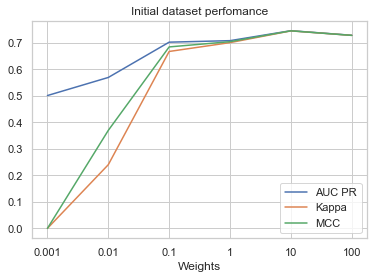

In [508]:
plt.plot(list(map(str, weight_list)), auc_list, label='AUC PR')
plt.plot(list(map(str, weight_list)), kappa_list, label='Kappa')
plt.plot(list(map(str, weight_list)), mcc_list, label='MCC')

plt.title('Initial dataset perfomance')
plt.xlabel('Weights')
plt.legend();

In [514]:
auc_list, kappa_list, mcc_list = [], [], []
weight_list = [0.001, 0.01, 0.1, 1, 10, 100]

for weight in tqdm(weight_list):
    based = CatBoostClassifier(iterations=100,
                               learning_rate=0.1, 
                               depth=7, 
                               verbose=0,
                               class_weights=(1, weight)).fit(X_res, y_res)
    y_pred = based.predict(X_test)
    auc_list.append(auc_pr(y_test, y_pred))
    kappa_list.append(kappa_cohen(y_test, y_pred))
    mcc_list.append(mcc(y_test, y_pred))

  0%|          | 0/6 [00:00<?, ?it/s]

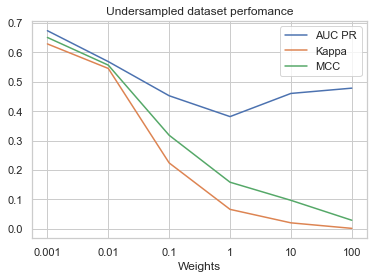

In [515]:
plt.plot(list(map(str, weight_list)), auc_list, label='AUC PR')
plt.plot(list(map(str, weight_list)), kappa_list, label='Kappa')
plt.plot(list(map(str, weight_list)), mcc_list, label='MCC')

plt.title('Undersampled dataset perfomance')
plt.xlabel('Weights')
plt.legend();

Даже такой наивный подход может дать относительно неплохие результаты и улучшить наши метрики. Тем не менее, сейчас мы никак не используем информацию о распределении объектов в выборке. Оказывается, что даже относительно простые эвристические правила могут заметно поднять нам качество - например, мы можем при отбрасывании использовать близость отдельных объектов мажорного класса к минорному и отбрасывать самые близкие. Протестируйте алгоритм [Near-Miss](https://www.site.uottawa.ca/~nat/Workshop2003/jzhang.pdf) на наших данных и постройте графики, аналогичные предыдущему пункту (также добавьте график с зависимостью качества от числа соседей).

In [521]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(n_neighbors=4)
X_res, y_res = nm.fit_resample(X_train, y_train)
X_res.shape

(834, 32)

In [522]:
auc_list, kappa_list, mcc_list = [], [], []
weight_list = [0.001, 0.01, 0.1, 1, 10, 100]

for weight in tqdm(weight_list):
    based = CatBoostClassifier(iterations=100,
                               learning_rate=0.1, 
                               depth=7, 
                               verbose=0,
                               class_weights=(1, weight)).fit(X_res, y_res)
    y_pred = based.predict(X_test)
    auc_list.append(auc_pr(y_test, y_pred))
    kappa_list.append(kappa_cohen(y_test, y_pred))
    mcc_list.append(mcc(y_test, y_pred))

  0%|          | 0/6 [00:00<?, ?it/s]

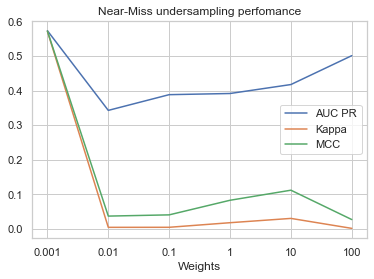

In [523]:
plt.plot(list(map(str, weight_list)), auc_list, label='AUC PR')
plt.plot(list(map(str, weight_list)), kappa_list, label='Kappa')
plt.plot(list(map(str, weight_list)), mcc_list, label='MCC')

plt.title('Near-Miss undersampling perfomance')
plt.xlabel('Weights')
plt.legend();

In [531]:
auc_list, kappa_list, mcc_list = [], [], []
neighbour_list = np.arange(2, 11)

for n in tqdm(neighbour_list):
    nm = NearMiss(n_neighbors=n)
    X_res, y_res = nm.fit_resample(X_train, y_train)

    based = CatBoostClassifier(iterations=100,
                               learning_rate=0.1, 
                               depth=7, 
                               verbose=0,
                               class_weights=(1, 0.001)).fit(X_res, y_res)
    y_pred = based.predict(X_test)
    auc_list.append(auc_pr(y_test, y_pred))
    kappa_list.append(kappa_cohen(y_test, y_pred))
    mcc_list.append(mcc(y_test, y_pred))

  0%|          | 0/9 [00:00<?, ?it/s]

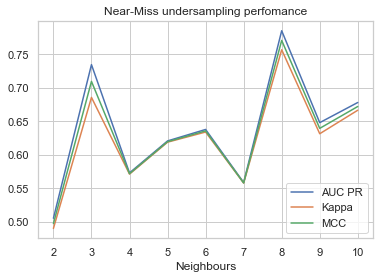

In [533]:
plt.plot(neighbour_list, auc_list, label='AUC PR')
plt.plot(neighbour_list, kappa_list, label='Kappa')
plt.plot(neighbour_list, mcc_list, label='MCC')

plt.title('Near-Miss undersampling perfomance')
plt.xlabel('Neighbours')
plt.legend();

**Бонус (1 балл)**. imblearn также предлагает много различных методов для андерсэмплинга. Выберите что-нибудь еще из предлагаемого на свой вкус, опишите идею метода и протестируйте его.

* EditedNearestNeighbours (ENN) - используют kNN, чтобы определить, какие точки следует убрать. Алгоритм удаляет точки, которые содержат большинство точек, не относящихся к тому же классу, что и рассматриваемая точка. (за 20 минут он так и не обучился, так как подсчет всех расстояний напрямую неблагодарное дело)

* RandomUnderSampler - быстрый способ отбора точек путем случайного выбора подмножества мажорного класса.

In [81]:
from imblearn.under_sampling import RandomUnderSampler

sm = RandomUnderSampler()
X_res, y_res = sm.fit_resample(X_train, y_train)
X_res.shape

(834, 32)

In [87]:
based = CatBoostClassifier(iterations=100,
                           learning_rate=0.1, 
                           depth=7, 
                           verbose=0,
                           class_weights=(1, 0.001)).fit(X_res, y_res)
y_pred = based.predict(X_test)
results(y_test, y_pred)

AUC PR:	 0.6051363605963325
Kappa:	 0.6043526439141317
MCC:	 0.6045163842180211


**Бонус (2 балла)**. Сможете ли вы с помощью комбинации любых методов оверсэмплинга, андерсэмплинга и классификации набрать 0.8 на всех трех метриках?

In [43]:
sm = SVMSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

auc_list, kappa_list, mcc_list = [], [], []
weight_list = [0.001, 0.01, 0.1, 1, 10, 100]

for weight in tqdm(weight_list):
    based = CatBoostClassifier(iterations=100,
                               learning_rate=0.1, 
                               depth=7, 
                               verbose=0,
                               class_weights=(1, weight)).fit(X_res, y_res)
    y_pred = based.predict(X_test)
    auc_list.append(auc_pr(y_test, y_pred))
    kappa_list.append(kappa_cohen(y_test, y_pred))
    mcc_list.append(mcc(y_test, y_pred))

  0%|          | 0/6 [00:00<?, ?it/s]

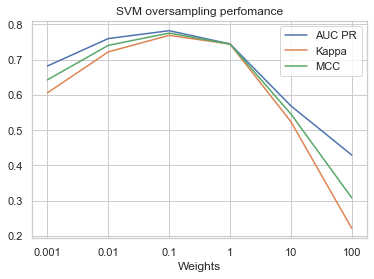

In [44]:
plt.plot(list(map(str, weight_list)), auc_list, label='AUC PR')
plt.plot(list(map(str, weight_list)), kappa_list, label='Kappa')
plt.plot(list(map(str, weight_list)), mcc_list, label='MCC')

plt.title('SVM SMOTE oversampling perfomance')
plt.xlabel('Weights')
plt.legend();

In [46]:
auc_list, kappa_list, mcc_list = [], [], []
neighbour_list = np.arange(2, 11)

for n in tqdm(neighbour_list):
    sm = SVMSMOTE(k_neighbors=n, random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    
    based = CatBoostClassifier(iterations=100,
                               learning_rate=0.1, 
                               depth=7, 
                               verbose=0,
                               class_weights=(1, 0.1)).fit(X_res, y_res)
    y_pred = based.predict(X_test)
    auc_list.append(auc_pr(y_test, y_pred))
    kappa_list.append(kappa_cohen(y_test, y_pred))
    mcc_list.append(mcc(y_test, y_pred))

  0%|          | 0/9 [00:00<?, ?it/s]

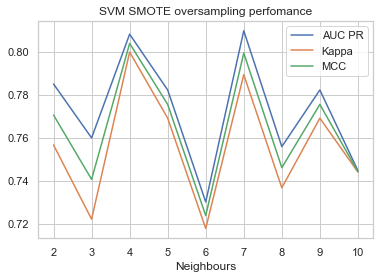

In [47]:
plt.plot(neighbour_list, auc_list, label='AUC PR')
plt.plot(neighbour_list, kappa_list, label='Kappa')
plt.plot(neighbour_list, mcc_list, label='MCC')

plt.title('SVM SMOTE oversampling perfomance')
plt.xlabel('Neighbours')
plt.legend();

In [55]:
sm = SVMSMOTE(k_neighbors=4, random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

based = CatBoostClassifier(iterations=100,
                           learning_rate=0.1, 
                           depth=7, 
                           verbose=0,
                           class_weights=(1, 0.1)).fit(X_res, y_res)
y_pred = based.predict(X_val)
results(y_val, y_pred)

AUC PR:	 0.858753908734365
Kappa:	 0.8349082488680916
MCC:	 0.8465240717550727


Ezzz!

# Часть 2. Поиск аномалий. 

Как вы могли заметить, методы балансировки выборок очень часто могут привести к не самым лучшим результатам из-за того, что они по сути искажают информацию о реальном распределении данных - в реальности обычно требуется долгий подбор в принципе работоспособных для задачи методов и их аккуратная настройка. 

Теперь давайте попробуем слегка сменить постановку задачи и переключиться на задачу "одноклассовой" классификации, то есть - поиска *аномалий* в выборке. В общем-то, это вполне согласуется с нашей областью работы - мы действительно можем назвать мошеннические транзакции аномальньми (как интуитивно, так и на основании наблюдаемой балансировки данных). 

Стоит отметить, что методы обнаружения аномалий чаще всего относятся к классу методов обучения без учителя. Это дает некоторый положительный эффект - нам не обязательно нужно тратить время на разметку данных (тем не менее, для контроля качества какую-то часть разметить все-таки придется). Впрочем, чаще всего перфоманс таких методов оказывается заметно хуже, чем у честного обучения с учителем (если мы можем себе его позволить).



**Задание 4. (3 балла).** На занятиях вы разбирали схожий с Random Forest подход для детекции аномалий без известной разметки данных, называемый Isolation Forest. Напомним суть: на этапе обучения мы создаем ансамбль из решающих деревьев, в котором признак и порог на каждую вершину подбираются случайно. Затем мы считаем для объектов оценку аномальности через длину пути до соответствующего листа в каждом дереве.

В данном задании вам предлагается реализовать модификацию данного алгоритма, известную как Extended Isolation Forest. В ней мы на каждом шаге будем определять не порог для признака, а полноценную случайную гиперплоскость, разбивающую выборку на 2 части. С детальным описанием вы можете ознакомиться [здесь](https://arxiv.org/pdf/1811.02141.pdf).

Ниже приведен шаблон кода. Постарайтесь работать в его рамках (минорные изменения вполне допустимы, главное не переворачивайте всю структуру с ног на голову). 

**NB**: будем считать, что в нашем датасете нет категориальных признаков - можете не заморачиваться с их обработкой (но в общем случае, это будет важно).

**Советы**:
 - Численные признаки лучше предобработать надлежащим образом.
 - Возможно, вам поможет выбрасывание некоторых признаков.
 - Внимательно следите за знаками.
 - Не игнорируйте документирующие строки.
 - Вероятнее всего, вы не сможете приблизиться по качеству к supervised-решениям. Если у вас не получается это сделать (но вы уверены в своей правоте), не стоит тратить слишком много времени на поиск ошибок.



**Бонусы (каждый по 0.5)**:
- Сделайте ваш EIF параллельным (`multiprocessing`, `joblib`).
- Добавьте возможность откатиться к дефолтному варианту Isolation Forest. (порассуждайте, как можно реализовать это в данной модели?):


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
def c_factor(n):
    """
    Computes average path length for an unsuccessful search in a binary search tree.
    Params:
        n: int - number of data points for BST
    """
    # harmonic_num = np.log(n - 1) + np.euler_gamma
    return np.log2(1 + n) # 2 * harmonic_num - 2 * (n - 1) / (n + 1e-5)

def calc_height(X, depth, node):
    """
    Calculates anomaly scores for sample in a recursive manner.
    Params:
        X: np.array - current sample, available to node
        depth: int - path length up to current node
        node: Node - current tree node
        
    Returns:
        scores: int, float or np.array - anomaly scores for sample
    """
    scores = np.zeros(X.shape[0])
    if node.kind == 'external':
        return scores + c_factor(X.shape[0]) + depth
    if node.kind == 'internal':
        w, b = node.w, node.b
        
        left = X[(X - b) @ w <= 0]
        right = X[(X - b) @ w > 0]
        scores[(X - b) @ w > 0] = calc_height(right, depth + 1, node.right)
        scores[(X - b) @ w <= 0] = calc_height(left, depth + 1, node.left)
    return scores


class Node(object):
    """
    A single node object for each tree. Contains information on height, current data,
    splitting hyperplane and children nodes.
    
    Attributes:
        X: np.array - data available to current node
        size: int - length of available data
        
        depth: int - depth of node

        left: Node - left child
        right: Node - right child

        kind: str - either "internal" or "external", indicates the type of current node

        w: np.array - normal vector for the splitting hyperplane
        b: float - intercept term for the splitting hyperplane
    """
    def __init__(self, X, depth, left, right, kind, w, b):
        """
        Node(h, left, right, kind, w, b)
        Represents the node object.
        
        Params:
            X: np.array - data available to current node
            depth: int - depth of node
            
            left: Node - left child
            right: Node - right child
            
            kind: str - either "internal" or "external", indicates the type of current node
            
            w: np.array - normal vector for the splitting hyperplane
            b: float - intercept term for the splitting hyperplane
            
        """
        self.size = len(X)
        
        self.depth = depth
        
        self.left = left
        self.right = right
        
        self.kind = kind
    
        self.w = w
        self.b = b
    
    def __repr__(self):
        """
        For convenience only.
        """
        return f"Node(size={self.size}, depth={self.depth}, kind={self.kind})"

class RandomizedTree(object):
    """
    Single randomized tree object. Stores root and its depth (tree is built recursively).
    Attributes:
        depth: int - current tree depth
        max_depth: int - maximum tree depth
        root: Node - root node 

        internal_count: int - number of internal nodes
        external_count: int - number of external nodes
        
    """
    def __init__(self, X, max_depth):
        """
        Single randomized tree object. Stores root and its depth (tree is built recursively).
        Params:
            X: np.array - train sample
            max_depth: int - maximum tree depth
        """
        self.depth = 0
        self.max_depth = max_depth
        
        self.internal_count = 0
        self.external_count = 0

        self.root = self.grow(X, 0)
        
    def __repr__(self):
        """
        For convenience only.
        """
        return f"RandomizedTree(depth={self.depth}, max_depth={self.max_depth}, n_internal={self.internal_count}, n_external={self.external_count})"

        
        
    def grow(self, X, depth):
        """
        Grow tree in a recursive manner.
        Params:
            X: np.array - available train sample
            depth: int - current tree depth
            
        Returns:
            node: Node - a trained node with separating hyperplane data.
                         Node provides access to children if necessary (these are built recursively)
        """
        if (depth + 1 > self.max_depth) or (X.shape[0] <= 1):
            kind = 'external'
            return Node(X, depth, None, None, kind, None, None)
        else:
            kind = 'internal'
            w = np.random.normal(size=X.shape[1])
            b = np.random.uniform(low=X_train.values.min(axis=0), 
                                  high=X_train.values.max(axis=0))
            
            left = self.grow(X[(X - b) @ w <= 0], depth+1)
            right = self.grow(X[(X - b) @ w > 0], depth+1)
            return Node(X, depth, left, right, kind, w, b)
        
    def score_samples(self, X):
        """
        Calculate anomaly scores for given data. You may utilize outer function `calc_height`.
        Params:
            X: np.array - data to be evaluated
            
        Returns:
            scores: np.array - estimated anomaly scores
        """
        return calc_height(X, 0, self.root)
        
    
class ExtendedIsolationForest(object):
    """
    Extended Isolation Forest object. Stores training data and trained randomized trees.
    Attributes:
        n_trees: int - number of Randomized Trees
        
        max_depth: int - maximum depth of each tree
        
        subsample_rate: float - draw `subsample_rate * X.shape[0]` samples for each tree
        
        trees: list - container for trained trees 
        
        contamination: float - estimated fraction of anomaly samples in data. Used for thresholding
        
    """
    
    def __init__(self, n_trees, subsample_rate, max_depth=None, contamination=0.01):
        """
        Extended Isolation Forest object. Stores training data and trained randomized trees.
        Params:
            n_trees: int - number of Randomized Trees

            subsample_rate: float - draw `subsample_rate * X.shape[0]` samples for each tree

            max_depth: int or None - maximum depth of each tree. Defaults to ceil(log_2(subsample_size)) if not provided

            contamination: float - estimated fraction of anomaly samples in data. Used for thresholding

        """
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.subsample_rate = subsample_rate
        self.trees = []
        self.contamination = contamination
        self.is_fit = False
        
    def __repr__(self):
        """For convenience only."""
        
        return f"ExtendedIsolationForest(n_trees={self.n_trees}, max_depth={self.max_depth}, subsample_rate={self.subsample_rate}, contamination={self.contamination}, is_fit={self.is_fit})"
        
    def fit(self, X):
        """
        Fit EIF to new data.
        Params:
            X: np.array - 2d array of samples
        """
        self.sample_size = int(X.shape[0] * self.subsample_rate)
        
        self.scaler = StandardScaler()
        X = self.scaler.fit_transform(X)
        
        for i in range(self.n_trees):
            indices = np.random.choice(X.shape[0], size=self.sample_size)
            self.trees.append(RandomizedTree(X[indices], self.max_depth))
        return self
    
    def score_samples(self, X):
        """
        Estimate (normalized) anomaly score for each given sample
        Params:
            X: np.array - new samples

        Returns:
            scores: np.array - anomaly scores (larger value means higher probability of a sample being an outlier)
        """
        scores = np.zeros(X.shape[0])
        for tree in self.trees:
            scores += tree.score_samples(X)
        scores = scores / self.n_trees
        return 2 ** (- scores / c_factor(self.sample_size))

    
    def predict(self, X):
        """
        Predict if given samples are outliers.
        Params:
            X: np.array - new samples

        Returns:
            labels: np.array - anomaly labels (1 for outliers, 0 for inliers)
        """
        X = self.scaler.transform(X)
        
        scores = self.score_samples(X)
        labels = scores > self.contamination
        return labels, scores

**Задание 5. (1 балл).** Протестируйте вашу реализацию EIF и подберите оптимальные гиперпараметры (наш метод не использует разметку, поэтому можете попробовать делать это на обучающей выборке). Сравните ее с обычным IF из `sklearn` (желательно делать это на одних и тех же параметрах). Удалось ли сделать лучше?

Возможно, ваш алгоритм выдал большие оценки объектам с негативной разметкой. Постарайтесь выбрать несколько таких объектов и доступно объяснить (= с кодом и графиками), почему так вышло:

In [96]:
np.random.seed(42)

X_full = X_train[:28480*2]
y_full = y_train[:28480*2]

In [97]:
eif = ExtendedIsolationForest(n_trees=100,
                              subsample_rate=0.001,
                              max_depth=10)
eif.fit(X_full.values)
_, scores = eif.predict(X_full.values)

In [98]:
print(scores.min())
print(scores.max())

0.046623970304070596
0.04852526341668269


In [103]:
y_eif = scores > 0.046723971304070596
results(y_full, y_eif)

AUC PR:	 0.1353426985461758
Kappa:	 0.1204631585737745
MCC:	 0.12557684579424813


In [104]:
from sklearn.ensemble import IsolationForest
isf = IsolationForest(n_estimators=100).fit(X_full.values)

y_isf = isf.predict(X_full.values) < 0
results(y_full, y_isf)

AUC PR:	 0.4604665023616976
Kappa:	 0.10876087114193819
MCC:	 0.22273029854661638


IsolationForest сработал лучше, чем наша реализация Extended IF.

**Задание 6. (1 балл).** `sklearn` также предлагает нам и другие методы для поиска аномалий. В этом задании мы предлагаем вам сделать следующее:

Для начала попробуйте использовать методы Local Outlier Factor и One-Class SVM. Сравните результаты с IF и EIF.  

In [34]:
import time

In [95]:
%%time
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=5, novelty=True).fit(X_full.values)

CPU times: total: 2min 9s
Wall time: 1min 11s


In [112]:
y_lof = lof.predict(X_full.values) < 0
results(y_full, y_lof)

AUC PR:	 0.26690350666916707
Kappa:	 0.14081025090659274
MCC:	 0.19166279955962348


In [113]:
%%time
from sklearn.svm import OneClassSVM
clf = OneClassSVM().fit(X_full.values)

CPU times: total: 2min 21s
Wall time: 2min 22s


In [114]:
y_svm = clf.predict(X_full.values) < 0
results(y_full, y_svm)

AUC PR:	 0.3430817469405281
Kappa:	 0.0020014044943821307
MCC:	 0.019087075565331284


LOF и SVM показали качество хуже, чем IF, но лучше, чем наша реализация EIF. 

У вас началась депрессия из-за плохих метрик? Не беда! Сейчас давайте сделаем так: все методы, опробованные в этой части, попробуем задействовать для создания дополнительных признаков в данных. Проделайте это (не забудьте, что обучаться здесь нужно на трейне). Теперь возьмите лучшую модель из предыдущей части и обучите на новых данных. Смогли ли unsupervised-методы повысить вам качество?

In [115]:
X_new = np.concatenate([X_full.values, y_eif.reshape(-1, 1),
                                       y_isf.reshape(-1, 1), 
                                       y_lof.reshape(-1, 1), 
                                       y_svm.reshape(-1, 1)], axis=1)
X_new.shape

(56960, 36)

In [123]:
split = int(X_new.shape[0] * 0.2)

X_train, y_train = X_new[:-split], y_full.iloc[:-split]
X_test, y_test = X_new[-split:], y_full.iloc[-split:]

In [124]:
y_train.sum(), y_test.sum()

(142, 15)

In [126]:
based = CatBoostClassifier(iterations=100,
                           learning_rate=0.1, 
                           depth=7, 
                           verbose=0,
                           class_weights=(1, 0.1)).fit(X_train, y_train)
y_pred = based.predict(X_test)
results(y_test, y_pred)

AUC PR:	 0.6338161282771535
Kappa:	 0.4207314818239019
MCC:	 0.5161483173981072


Качество с новыми признаками не превысило качество изначальной модели с оверсэмплингом. \
Возможно unsupervised методы не так хороши, как supervised.


**Бонус. (0.1 балла).**

При сдаче проверяющий запустит следующую клетку один раз. Если она даст положительный результат, вы получите 0.1 бонусных балла. Если она даст отрицательный результат, вы получите -0.1 бонусных балла. Если вы получите ровно 0, то мы посчитаем вас невероятно везучим человеком и в качестве поощрения зачтем теорминимум на коллоквиуме. 

Если вы хотите отказаться от сдачи данного задания, допишите "хочу" после двоеточия: `your text here`

Ниже вы можете попрактиковаться и оценить ваши силы (изменять код ячейки запрещается!)

In [ ]:
import numpy as np

np.random.randn()